# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [3]:
print("Воспроизводимость проверяющим результатов, более простой отладки кода")

Воспроизводимость проверяющим результатов, более простой отладки кода


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
random_rows = df_train.sample(10)
random_rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [9]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [10]:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [11]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

mileage          
engine           
max_power        
torque           
seats            

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [12]:
df_train.duplicated(subset=df_train.columns.difference(['selling_price'])).sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [13]:
features = df_train.columns.difference(['selling_price'])
df_train[df_train.duplicated(subset=features, keep=False)]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [14]:
features = df_train.columns.difference(['selling_price'])
df_train = df_train.drop_duplicates(subset=features, keep='first')

In [15]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [16]:
df_train.reset_index(drop=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [17]:
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

In [18]:
df_train['mileage'] = pd.to_numeric(df_train['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', ''), errors='coerce')
df_train['engine'] = pd.to_numeric(df_train['engine'].str.replace(' CC', ''), errors='coerce')
df_train['max_power'] = pd.to_numeric(df_train['max_power'].str.replace(' bhp', ''), errors='coerce')
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [19]:
df_test['mileage'] = pd.to_numeric(df_test['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', ''), errors='coerce')
df_test['engine'] = pd.to_numeric(df_test['engine'].str.replace(' CC', ''), errors='coerce')
df_test['max_power'] = pd.to_numeric(df_test['max_power'].str.replace(' bhp', ''), errors='coerce')
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,5.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [20]:
columns_to_fill = ['mileage', 'engine', 'max_power', 'seats']

medians = df_train[columns_to_fill].median()

df_train[columns_to_fill] = df_train[columns_to_fill].fillna(medians)
df_test[columns_to_fill] = df_test[columns_to_fill].fillna(medians)

print("Пропуски в тренировочном наборе данных:")
print(df_train.isnull().sum())

print("\nПропуски в тестовом наборе данных:")
print(df_test.isnull().sum())

Пропуски в тренировочном наборе данных:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

Пропуски в тестовом наборе данных:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [21]:
print("Он представляет собой ограниченный и дискретный набор значений")

Он представляет собой ограниченный и дискретный набор значений


In [22]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

df_train.dtypes 

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

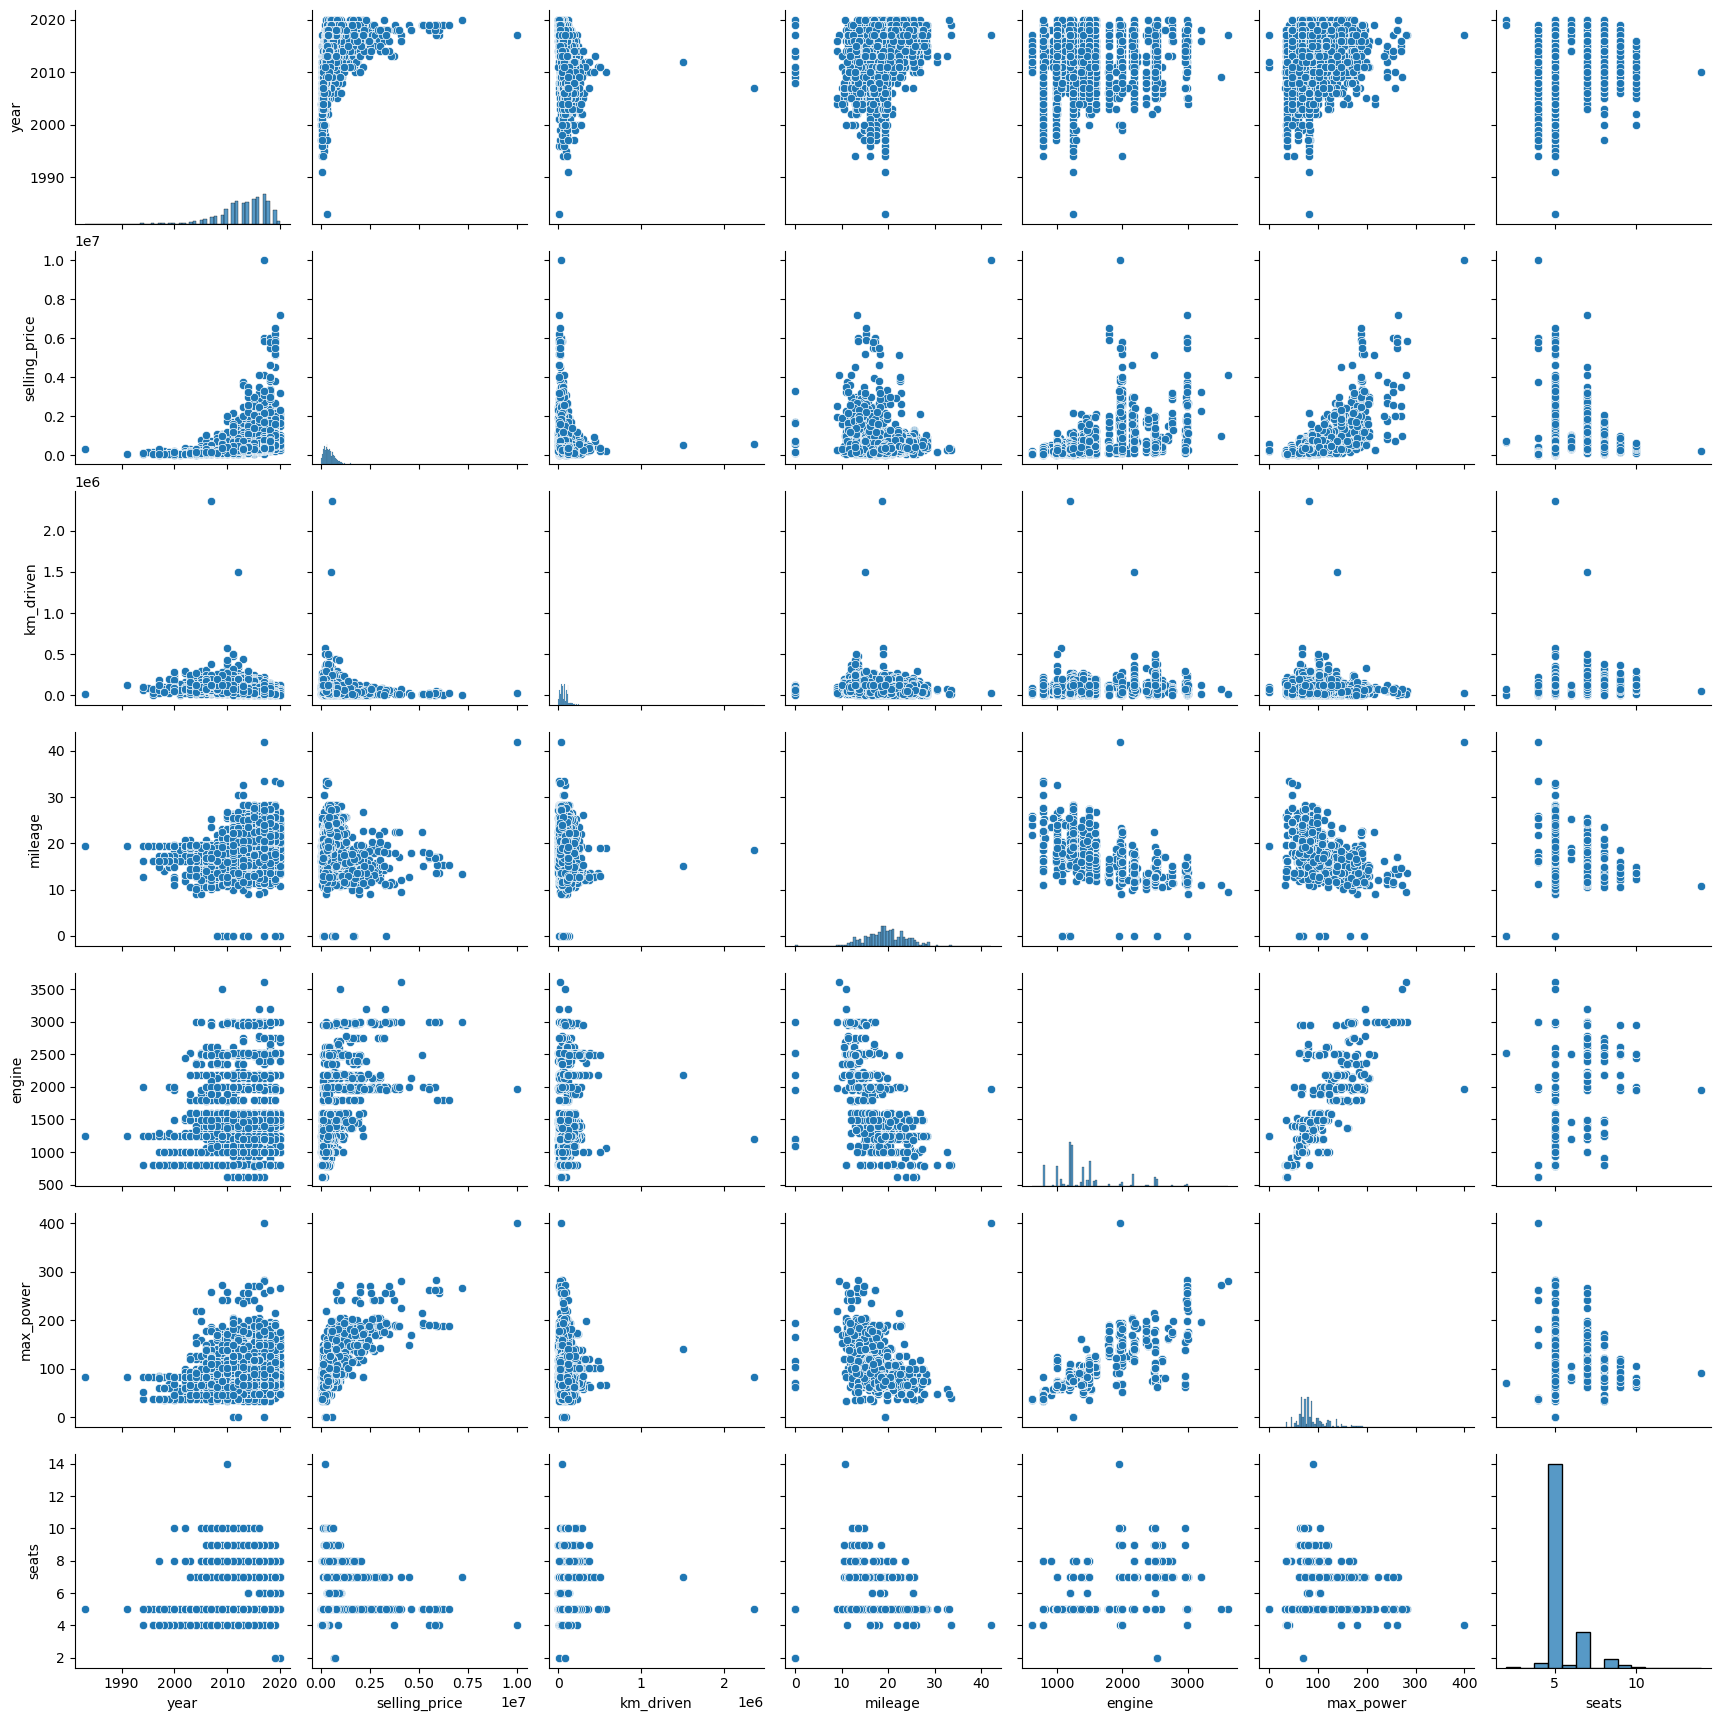

In [23]:
sns.pairplot(df_train)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [24]:
print("Можно заметить выбросы; видны зависимости")

Можно заметить выбросы; видны зависимости


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

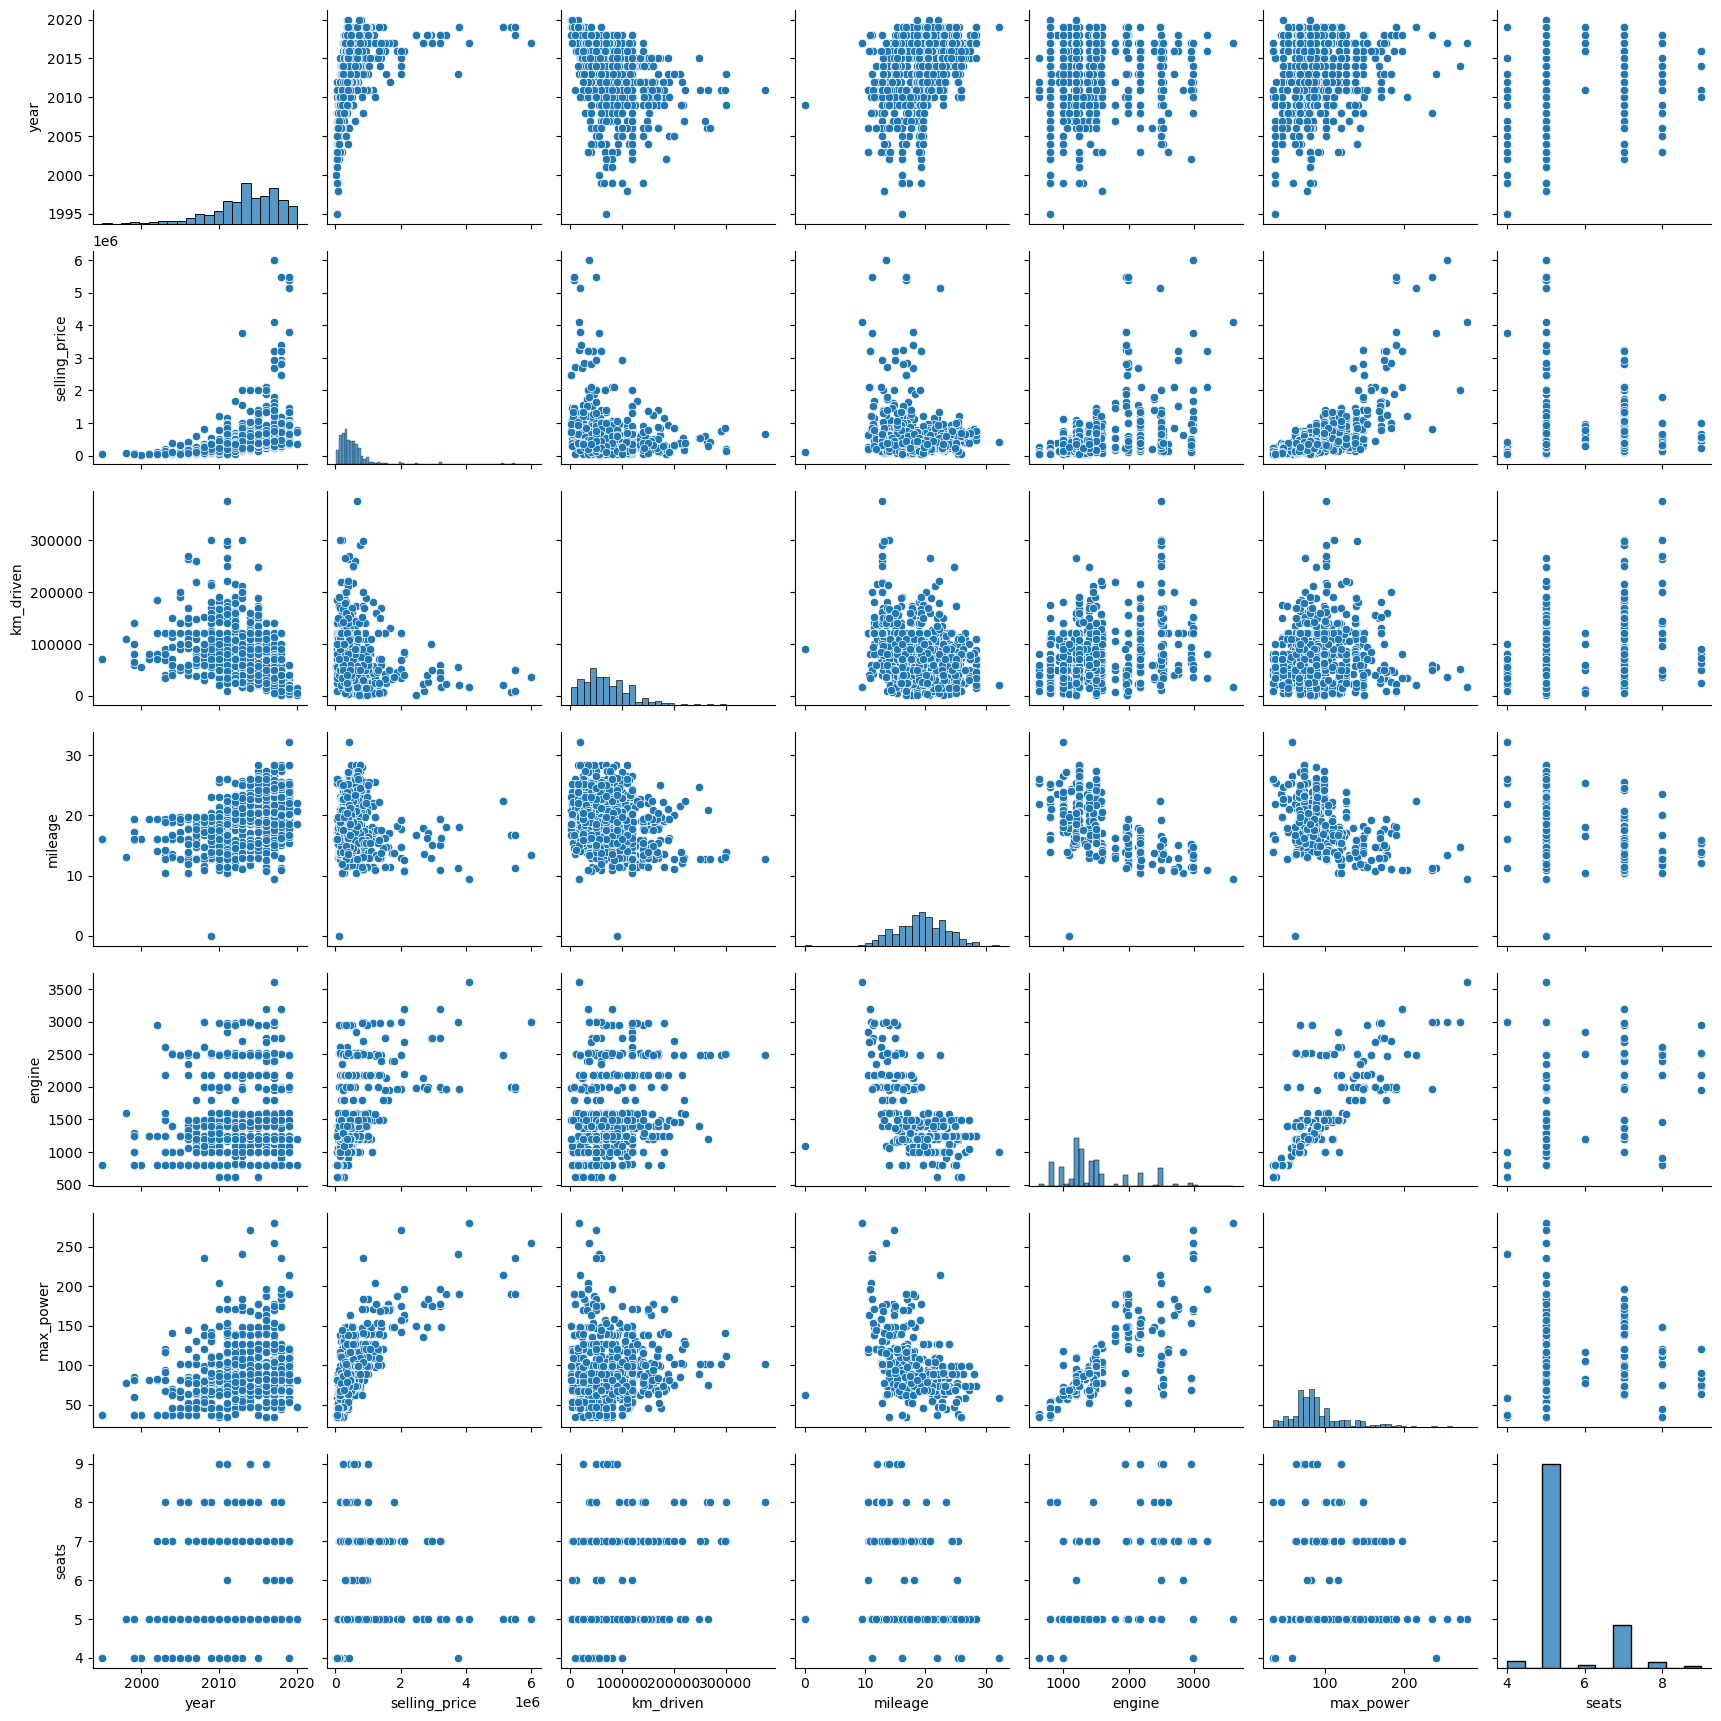

In [25]:
sns.pairplot(df_test)
plt.show()

In [26]:
print("В целом похожи")

В целом похожи


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

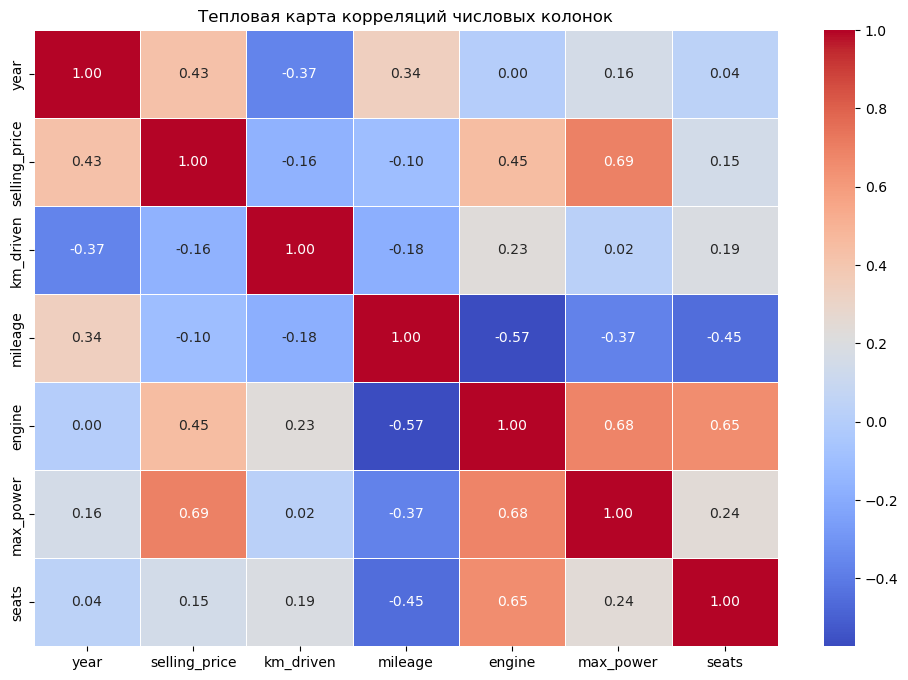

In [27]:
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df_train[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Тепловая карта корреляций числовых колонок")
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [28]:
print("- selling_price и max_power\n- selling_price c engine, year\n- -0.37, так что вроде да")

- selling_price и max_power
- selling_price c engine, year
- -0.37, так что вроде да


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

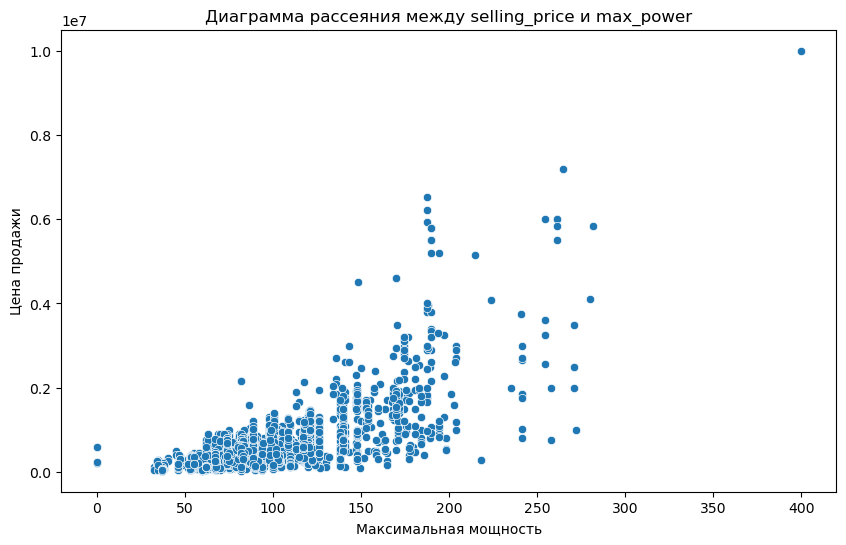

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='max_power', y='selling_price', data=df_train)

plt.title('Диаграмма рассеяния между selling_price и max_power')
plt.xlabel('Максимальная мощность')
plt.ylabel('Цена продажи')

plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

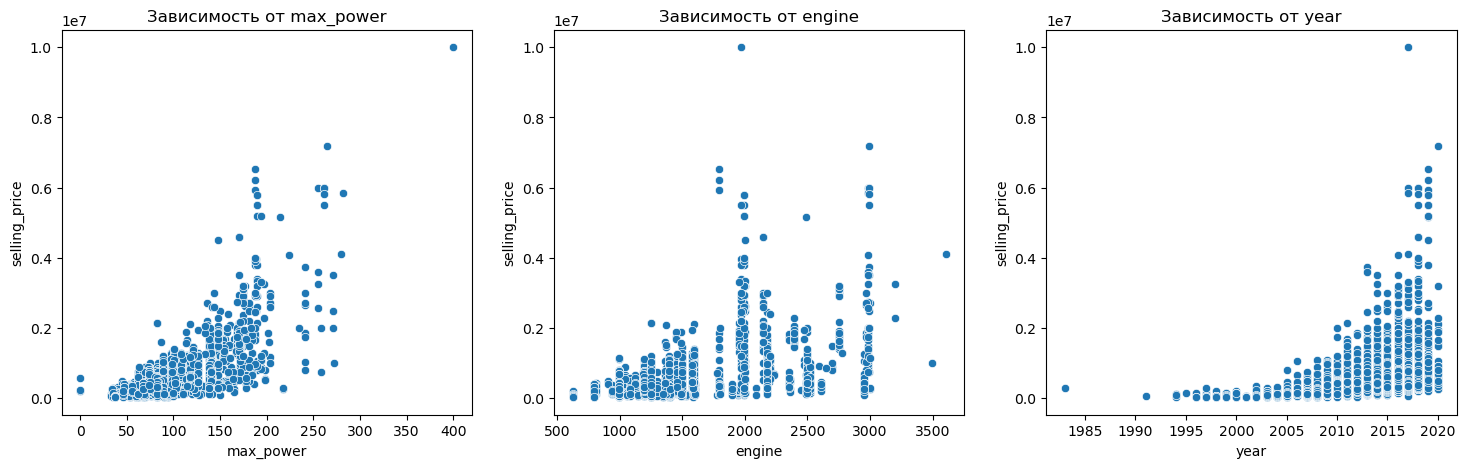

In [30]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='max_power', y='selling_price', data=df_train)
plt.title('Зависимость от max_power')

plt.subplot(1, 3, 2)
sns.scatterplot(x='engine', y='selling_price', data=df_train)
plt.title('Зависимость от engine')

plt.subplot(1, 3, 3)
sns.scatterplot(x='year', y='selling_price', data=df_train)
plt.title('Зависимость от year')

plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [31]:
y_train = df_train['selling_price'].values
columns_to_drop = ['name', 'fuel', 'transmission', 'owner', 'seller_type', 'selling_price']
X_train = df_train.drop(columns = columns_to_drop)

In [32]:
assert X_train.shape == (5840, 6)

In [33]:
y_test = df_test['selling_price'].values
X_test = df_test.drop(columns = columns_to_drop)

In [34]:
assert X_test.shape == (1000, 6)

In [35]:
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
6992,2008,191000,17.92,1086,62.10,5
6993,2013,50000,18.90,998,67.10,5
6994,2013,110000,18.50,1197,82.85,5
6995,2007,119000,16.80,1493,110.00,5


(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'R2 на тренировочном наборе: {r2_train}')
print(f'R2 на тестовом наборе: {r2_test}')
print(f'MSE на тренировочном наборе: {mse_train}')
print(f'MSE на тестовом наборе: {mse_test}')

R2 на тренировочном наборе: 0.5922591702157318
R2 на тестовом наборе: 0.5941419794788417
MSE на тренировочном наборе: 116874153930.02847
MSE на тестовом наборе: 233298779730.45554


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'R2 на тренировочном наборе: {r2_train}')
print(f'R2 на тестовом наборе: {r2_test}')
print(f'MSE на тренировочном наборе: {mse_train}')
print(f'MSE на тестовом наборе: {mse_test}')

R2 на тренировочном наборе: 0.5922591702157305
R2 на тестовом наборе: 0.5941419794788518
MSE на тренировочном наборе: 116874153930.0289
MSE на тестовом наборе: 233298779730.44974


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [38]:
features = ('year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats')
coefficients = model.coef_
absolute_coefficients = abs(coefficients)

for feature, coef in zip(features, absolute_coefficients):
    print(f'Признак: {feature}, Коэффициент: {coef}')

most_informative_feature = features[absolute_coefficients.argmax()]
print(f'\nНаиболее информативный признак: {most_informative_feature}')

Признак: year, Коэффициент: 152772.57084581413
Признак: km_driven, Коэффициент: 44158.81852005259
Признак: mileage, Коэффициент: 28833.92577751742
Признак: engine, Коэффициент: 61178.49433684742
Признак: max_power, Коэффициент: 322807.35325923405
Признак: seats, Коэффициент: 23209.132485997292

Наиболее информативный признак: max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [39]:
from sklearn.linear_model import Lasso

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso_model = Lasso(alpha=10000.0)
lasso_model.fit(X_train_scaled, y_train)

y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'R2 на тренировочном наборе: {r2_train}')
print(f'R2 на тестовом наборе: {r2_test}')
print(f'MSE на тренировочном наборе: {mse_train}')
print(f'MSE на тестовом наборе: {mse_test}')

R2 на тренировочном наборе: 0.5892503567970668
R2 на тестовом наборе: 0.58159380804752
MSE на тренировочном наборе: 117736595208.78354
MSE на тестовом наборе: 240511826990.2258


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [40]:
coefficients = lasso_model.coef_

absolute_coefficients = abs(coefficients)

for feature, coef in zip(features, absolute_coefficients):
    print(f'Признак: {feature}, Коэффициент: {coef}')

most_informative_feature = features[absolute_coefficients.argmax()]
print(f'\nНаиболее информативный признак: {most_informative_feature}')
print('\n\nЯ поставил высокий alpha, и из-за этого он занулил seats. При alpha = 1 ничего не зануляется')

Признак: year, Коэффициент: 151810.98386365655
Признак: km_driven, Коэффициент: 32735.113566286363
Признак: mileage, Коэффициент: 9285.99792205311
Признак: engine, Коэффициент: 17841.622334842425
Признак: max_power, Коэффициент: 329230.1475717459
Признак: seats, Коэффициент: 0.0

Наиболее информативный признак: max_power


Я поставил высокий alpha, и из-за этого он занулил seats. При alpha = 1 ничего не зануляется


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]  
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, 
                           scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f'R2 на тренировочном наборе: {r2_train}')
print(f'R2 на тестовом наборе: {r2_test}')
print(f'MSE на тренировочном наборе: {mse_train}')
print(f'MSE на тестовом наборе: {mse_test}')

Лучшие параметры: {'lasso__alpha': 1000}
R2 на тренировочном наборе: 0.5892503567970668
R2 на тестовом наборе: 0.5929610381458168
MSE на тренировочном наборе: 117736595208.78354
MSE на тестовом наборе: 233977618531.212


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [42]:
print('Количество моделей = Количество значений alpha x Количество фолдов = 8x10 = 80')

Количество моделей = Количество значений alpha x Количество фолдов = 8x10 = 80


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [43]:
print("Лучшие параметры:", grid_search.best_params_)

lasso_coefficients = best_model.named_steps['lasso'].coef_
print('\nКоэффициенты лучшей Lasso-модели:')
for feature, coef in zip(features, lasso_coefficients):
    print(f'Признак: {feature}, Коэффициент: {coef}')

print('\nНичего не занулилось')

Лучшие параметры: {'lasso__alpha': 1000}

Коэффициенты лучшей Lasso-модели:
Признак: year, Коэффициент: 152556.38661628403
Признак: km_driven, Коэффициент: -43052.234679976405
Признак: mileage, Коэффициент: 27010.694998877672
Признак: engine, Коэффициент: 56435.71493782838
Признак: max_power, Коэффициент: 323666.83481167705
Признак: seats, Коэффициент: -20352.142469249924

Ничего не занулилось


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [44]:
from sklearn.linear_model import ElasticNet

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet())
])

param_grid = {
    'elasticnet__alpha': [0.001, 0.01, 0.1, 1, 10, 100], 
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка (MSE) на кросс-валидации:", -grid_search.best_score_)

best_model = grid_search.best_estimator_

best_model1 = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test)
mse_test = MSE(y_test, y_test_pred)
print(f'MSE на тестовом наборе с лучшей моделью: {mse_test}')

Лучшие параметры: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.9}
Лучшая оценка (MSE) на кросс-валидации: 121286024609.12122
MSE на тестовом наборе с лучшей моделью: 234562589441.86063


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [45]:
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.9}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [46]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5


In [47]:
columns_to_drop = ['selling_price', 'name']

X_train_cat = df_train.drop(columns = columns_to_drop)
X_test_cat = df_test.drop(columns = columns_to_drop)

In [48]:
assert X_train_cat.shape == (5840, 10)

In [49]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [50]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

X_train_encoded = pd.get_dummies(X_train_cat, columns=categorical_features, drop_first=True)

X_test_encoded = pd.get_dummies(X_test_cat, columns=categorical_features, drop_first=True)

X_train_encoded.head()

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
1,2014,120000,21.14,1498,103.52,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,2010,127000,23.00,1396,90.00,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,2007,120000,16.10,1298,88.20,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2017,45000,20.14,1197,81.86,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False


In [51]:
X_test_encoded.head()

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_5,seats_6,seats_7,seats_8,seats_9
0,2010,168000,14.0,2498,112.0,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False
1,2017,25000,21.5,1497,108.5,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False
2,2007,218463,12.9,1799,130.0,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False
3,2015,173000,25.1,1498,98.6,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,2011,70000,16.5,1172,65.0,False,False,True,True,False,True,False,True,False,False,True,False,False,False,False


In [52]:
X_test_encoded['seats_10'] = False
X_test_encoded['seats_14'] = False
X_test_encoded['seats_4'] = False

desired_order = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14']

X_test_encoded = X_test_encoded[desired_order]
X_test_encoded.head()

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2010,168000,14.0,2498,112.0,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2017,25000,21.5,1497,108.5,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,2007,218463,12.9,1799,130.0,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
3,2015,173000,25.1,1498,98.6,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2011,70000,16.5,1172,65.0,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

ridge = Ridge()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]  # Пример значений параметра alpha
}

scorer = make_scorer(r2_score)

grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring=scorer)

grid_search.fit(X_train_encoded, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка (R2) на кросс-валидации:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_encoded)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 на тестовом наборе с лучшей моделью: {r2_test}')# r2 to beat:0.5929610381458168

print('R2 увеличился; качество предсказаний улучшено')

/home/pasha/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.05758e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Лучшие параметры: {'alpha': 10}
Лучшая оценка (R2) на кросс-валидации: 0.6218651753943557
R2 на тестовом наборе с лучшей моделью: 0.6416281000731175
R2 увеличился; качество предсказаний улучшено


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [54]:
model = LinearRegression()
model.fit(X_train_encoded, y_train)

y_train_pred_b = model.predict(X_train_encoded)
y_test_pred_b = model.predict(X_test_encoded)

r2_train = r2_score(y_train, y_train_pred_b)
r2_test = r2_score(y_test, y_test_pred_b)

print(f'R2 на тренировочном наборе: {r2_train}')
print(f'R2 на тестовом наборе: {r2_test}')

R2 на тренировочном наборе: 0.6672861677720163
R2 на тестовом наборе: 0.6242876565688397


In [55]:
r2tb = 0.6242876565688397# r2 to beat:0.6242876565688397

In [56]:
X_train_encoded.head()

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
1,2014,120000,21.14,1498,103.52,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,2010,127000,23.00,1396,90.00,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,2007,120000,16.10,1298,88.20,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2017,45000,20.14,1197,81.86,False,False,True,True,False,...,False,False,False,True,False,False,False,False,False,False


In [57]:
X_train_b = X_train_encoded
X_test_b = X_test_encoded

X_train_b['pwr_per_engine'] = X_train_b['max_power'] / X_train_b['engine']
X_test_b['pwr_per_engine'] = X_test_b['max_power'] / X_test_b['engine']



In [58]:
model = Lasso(alpha=100.0)  # удалим ненужные параметры
model.fit(X_train_b, y_train)
coefficients = model.coef_
print(coefficients)
zero_coefficient_columns = X_train_b.columns[coefficients == 0]
unneeded_columns = list(zero_coefficient_columns)

X_train_b = X_train_b.drop(unneeded_columns, axis=1)
X_test_b = X_test_b.drop(unneeded_columns, axis=1)

[ 3.65815426e+04 -5.03372031e-01  8.58108145e+03  4.82555166e+01
  9.66327627e+03  3.43494602e+04  1.44831188e+05 -2.09970747e+04
 -1.00764355e+05 -9.51856906e+04 -2.83312158e+05 -3.53916446e+04
 -5.29904329e+04  3.16188653e+06 -3.61397119e+04  5.39857245e+05
 -3.29543923e+04 -1.10819564e+05 -2.77012226e+04  5.36229713e+03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -1.49283209e+06]


In [59]:
X_train_b.head()

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,pwr_per_engine
0,2014,145500,23.40,1248,74.00,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.059295
1,2014,120000,21.14,1498,103.52,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,0.069105
2,2010,127000,23.00,1396,90.00,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.064470
3,2007,120000,16.10,1298,88.20,False,False,True,True,False,...,False,False,False,False,False,True,False,False,False,0.067951
4,2017,45000,20.14,1197,81.86,False,False,True,True,False,...,False,False,False,False,False,True,False,False,False,0.068388


In [60]:
model = LinearRegression()
model.fit(X_train_b, y_train)

y_train_pred_b = model.predict(X_train_b)
y_test_pred_b = model.predict(X_test_b)

r2_train = r2_score(y_train, y_train_pred_b)
r2_test = r2_score(y_test, y_test_pred_b)

print(f'R2 на тренировочном наборе: {r2_train}')
print(f'R2 на тестовом наборе: {r2_test}')
print(f'R2 на тестовом наборе - r2tb: {r2_test- r2tb}') 

R2 на тренировочном наборе: 0.6721391703892499
R2 на тестовом наборе: 0.6343488997320892
R2 на тестовом наборе - r2tb: 0.010061243163249523


In [61]:
r2tb = r2_test # Увеличилоcь

In [62]:
X_train_b['year'] = X_train_b['year'] ** 2

In [63]:
X_test_b['year'] = X_test_b['year'] ** 2

In [64]:
model = LinearRegression()
model.fit(X_train_b, y_train)

y_train_pred_b = model.predict(X_train_b)
y_test_pred_b = model.predict(X_test_b)

r2_train = r2_score(y_train, y_train_pred_b)
r2_test = r2_score(y_test, y_test_pred_b)

print(f'R2 на тренировочном наборе: {r2_train}')
print(f'R2 на тестовом наборе: {r2_test}')
print(f'R2 на тестовом наборе - r2tb: {r2_test- r2tb}')

R2 на тренировочном наборе: 0.6722468540767426
R2 на тестовом наборе: 0.6344229270843293
R2 на тестовом наборе - r2tb: 7.4027352240158e-05


In [65]:
r2tb = r2_test # Увеличилоcь

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [66]:
def business_metrics(y_true, y_pred):
    correct_predictions = np.sum(np.abs(np.array(y_pred) - np.array(y_true)) <=
                                  np.array(y_true) * (10 / 100))

    accuracy_percentage = (correct_predictions / len(y_pred)) * 100

    return accuracy_percentage

business_metrics(y_test, y_test_pred_b)

23.0

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [67]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

ModuleNotFoundError: No module named 'fastapi'

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

In [68]:
import pickle

# save the model to disk
filename = 'finalized_model.pickle'
pickle.dump(best_model1, open(filename, 'wb'))

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link